In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
file = '.\concrete_mix_design_simplified.csv'
df = pd.read_csv(file)
df = df[df['age'] >= 28]
columns_to_drop = ['probe_index', 'name', 'weight_fresh', 'weight_at_test', 'size_x', 'size_y', 'size_z', 'age','slump.1']
df = df.drop(columns=columns_to_drop)
###############################################################################################    
target_column= 'compressive_strength'
target_column1 = 'slump'

The following code reads the data and performs preprocessing using our 'data_processing' file. 
When the 'Variance' in the bottom image is greater than 20, 
it's often advisable to rerun the 'data_processing' function. 
This is because the columns with somehow important regression relationships might have been removed.

best_params are: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
useless_feature: ['q_non_crushed_sand', 'CEM_id_CEM_III', 'q_waterproofing', 'CEM_id_CEM_IV', 'q_retardant']


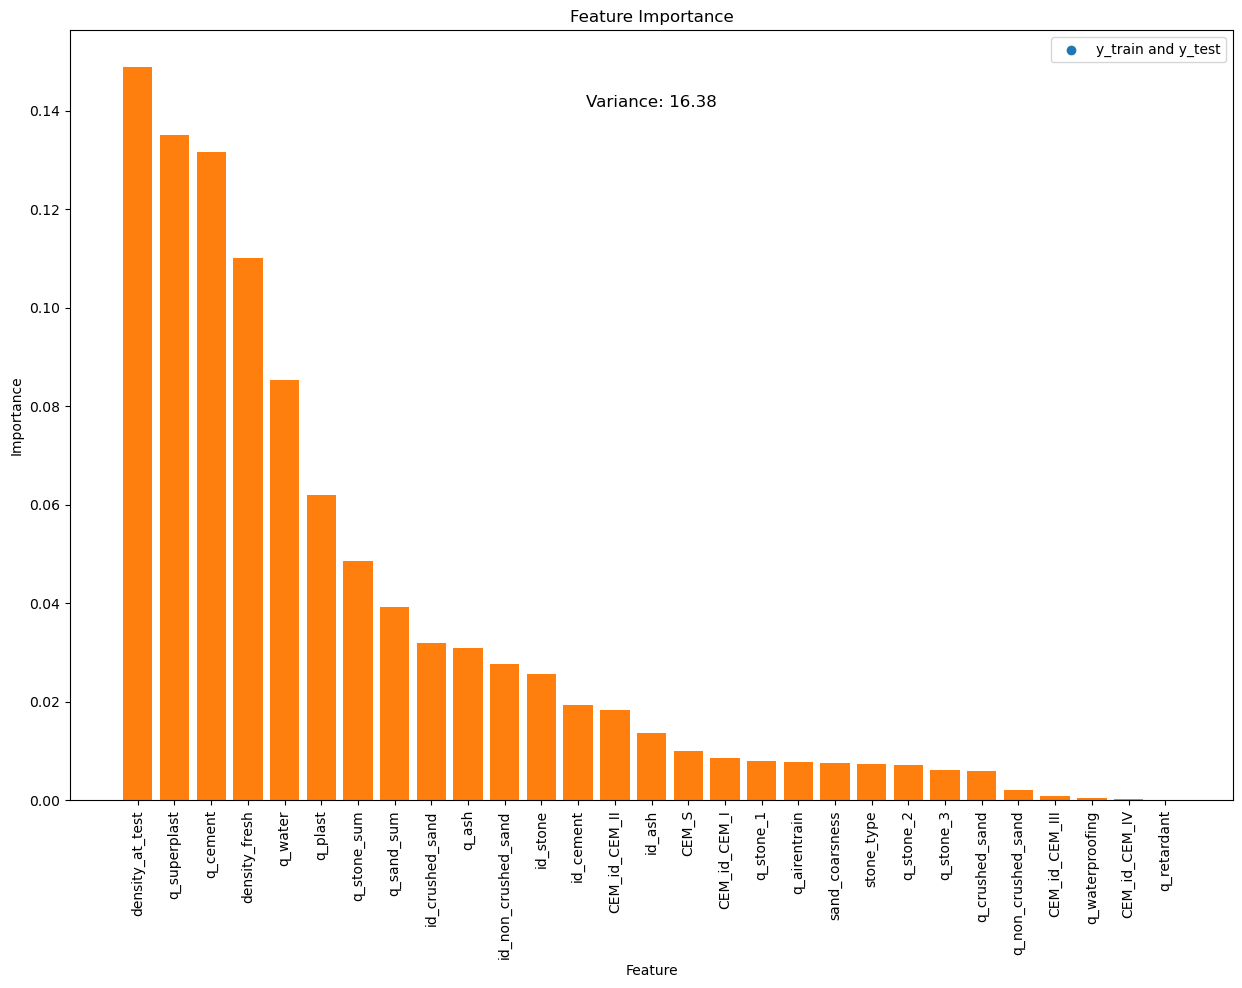

best_params are: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
useless_feature: ['q_airentrain', 'q_non_crushed_sand', 'CEM_id_CEM_III', 'q_waterproofing', 'CEM_id_CEM_IV', 'q_retardant']


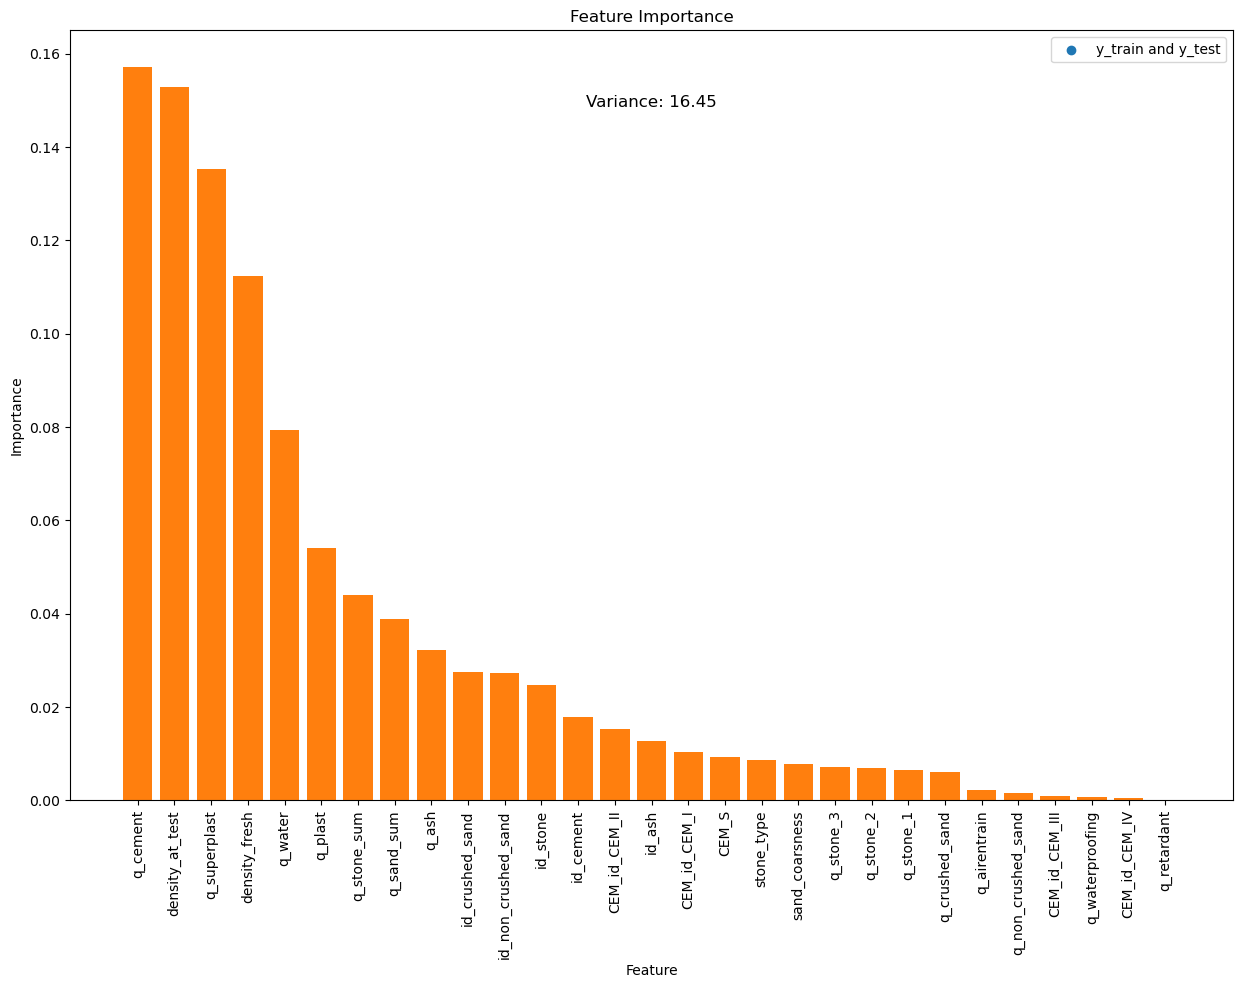

In [3]:
from data_analysis import data_processing
df = data_processing(df, target_column, target_column1)

best_params are: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


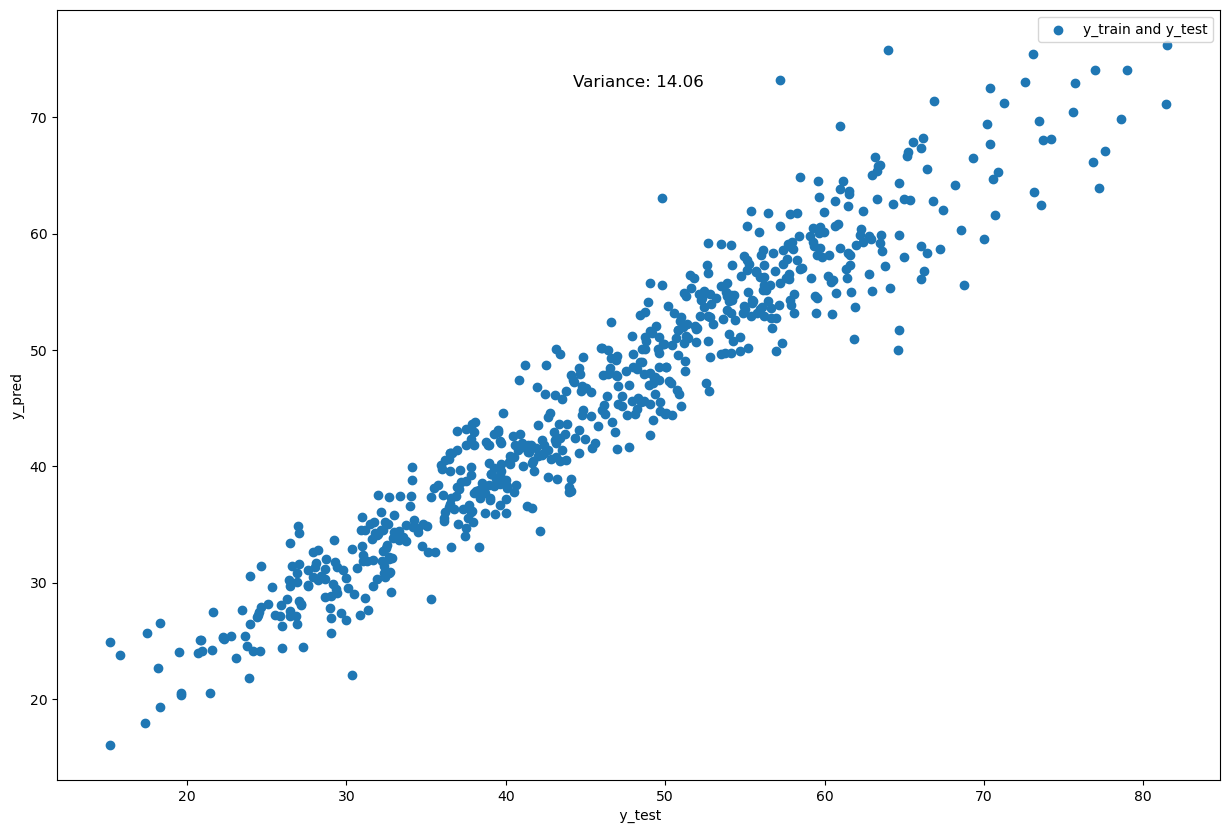

In [4]:
df = df.drop(target_column1,axis=1)
X = df.drop(target_column,axis=1)
y = df[target_column] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
param_grid = {'n_estimators': [50, 100, 20],'max_depth': [None, 2, 5],'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}    
RFre = RandomForestRegressor()
grid_search = GridSearchCV(estimator=RFre, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print('best_params are:',best_params)
final_RFre = RandomForestRegressor(**best_params)
final_RFre.fit(X_train, y_train)
y_pred = final_RFre.predict(X_test)
variance = np.var(y_pred - y_test)
###############################################################################################################
plt.figure(figsize=(15, 10))
plt.scatter( y_test,y_pred,label='y_train and y_test')
plt.xlabel(' y_test')
plt.ylabel('y_pred')
plt.text(0.5, 0.9, f'Variance: {variance:.2f}', transform=plt.gca().transAxes, fontsize=12, ha='center')
plt.legend()

In [5]:
file = '.\concrete_mix_design_simplified.csv'
df = pd.read_csv(file)
df = df[df['age'] >= 28]
columns_to_drop = ['probe_index', 'name', 'weight_fresh', 'weight_at_test', 'size_x', 'size_y', 'size_z', 'age','slump.1']
df = df.drop(columns=columns_to_drop)
###############################################################################################    
target_column= 'slump'
target_column1 = 'compressive_strength'

best_params are: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
useless_feature: ['CEM_id_CEM_II', 'CEM_id_CEM_I', 'CEM_id_CEM_IV', 'q_non_crushed_sand', 'q_waterproofing', 'q_airentrain', 'CEM_id_CEM_III', 'q_retardant']


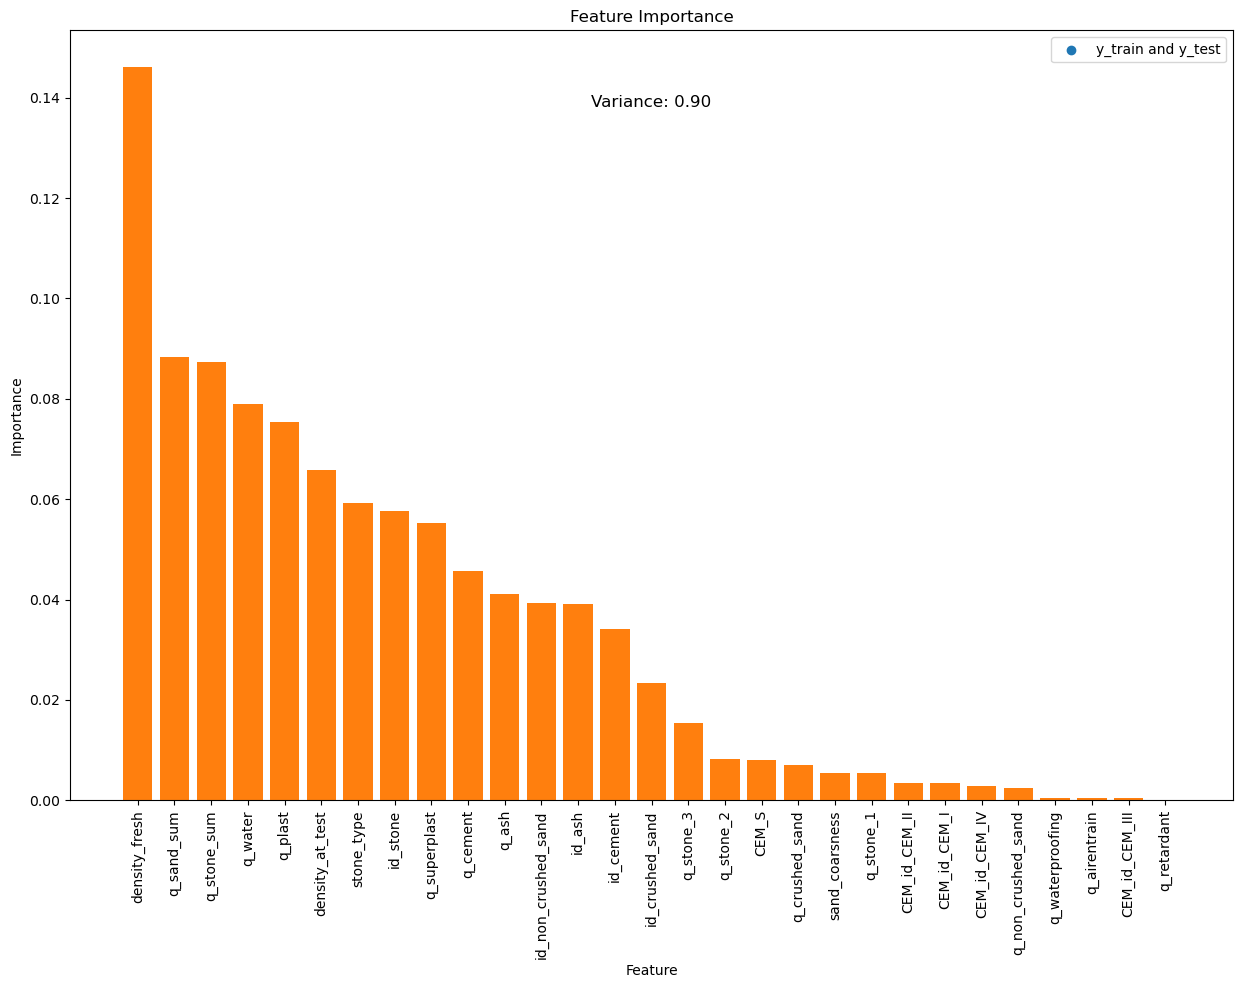

In [6]:
df = data_processing(df, target_column, target_column1)

best_params are: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


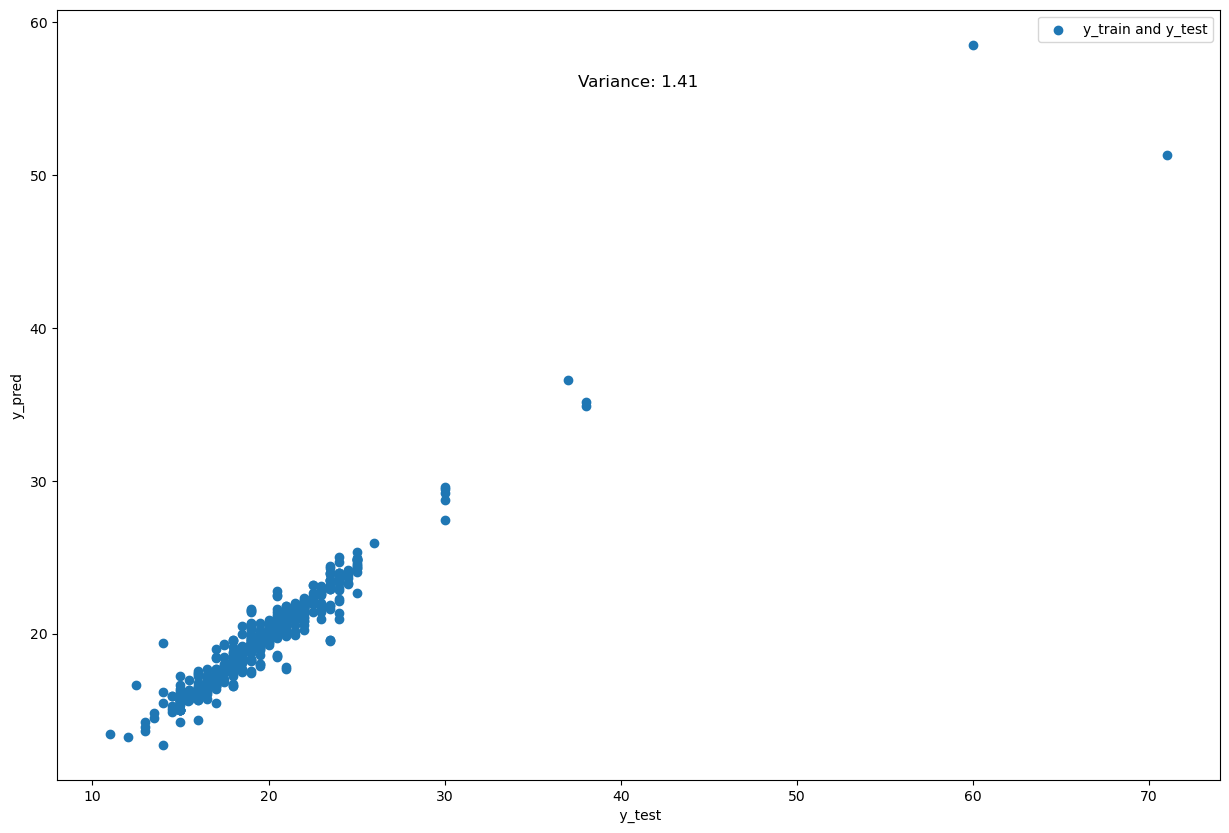

In [7]:
df = df.drop(target_column1,axis=1)
X = df.drop(target_column,axis=1)
y = df[target_column] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
param_grid = {'n_estimators': [50, 100, 20],'max_depth': [None, 2, 5],'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}    
RFre = RandomForestRegressor()
grid_search = GridSearchCV(estimator=RFre, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print('best_params are:',best_params)
final_RFre = RandomForestRegressor(**best_params)
final_RFre.fit(X_train, y_train)
y_pred = final_RFre.predict(X_test)
variance = np.var(y_pred - y_test)
###############################################################################################################
plt.figure(figsize=(15, 10))
plt.scatter( y_test,y_pred,label='y_train and y_test')
plt.xlabel(' y_test')
plt.ylabel('y_pred')
plt.text(0.5, 0.9, f'Variance: {variance:.2f}', transform=plt.gca().transAxes, fontsize=12, ha='center')
plt.legend()